In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import KFold, cross_validate, cross_val_score, cross_val_predict, train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, learning_curve
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score, make_scorer
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, PrecisionRecallDisplay

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import TomekLinks
from collections import Counter


from sklearn.feature_selection import SelectKBest, chi2 
from sklearn.pipeline import Pipeline



from sklearn.preprocessing import LabelEncoder

In [19]:
df = pd.read_csv("df_preprocessed.csv", skipinitialspace= True)
df.head()

,tweet,is_hate_speech,dataset,retweet_count,favorite_count,is_reply,is_quote,statuses_count,followers_count,friends_count,...,Hash_words_ad,clean_tweet,clean_anonymized_description,tweet_len,word_count,tokenized_text,pos_tags,lemmatized_text,stemmed_text,swear_word_bin
0,@unknown Con tutte le denunce che si sta becca...,1,0,0.0,6.0,1.0,0.0,554.0,748.0,753.0,...,No hashtags,Con tutte le denunce che si sta beccando Salvi...,Avete presente quegli stereotipi sui siciliani...,120,20,"['denunce', 'beccando', 'Salvini', 'rischia', ...","[('denunce', 'NOUN'), ('beccando', 'VERB'), ('...","['denuncia', 'beccare', 'Salvini', 'rischiare'...","['denunc', 'becc', 'salvin', 'risc', 'aument',...",0
1,#PRESCRIZIONE : I (t)re magi hanno trovato l’a...,0,0,154.0,448.0,0.0,0.0,35043.0,10838.0,4535.0,...,No hashtags,PRESCRIZIONE I tre magi hanno trovato laccord...,Prof di latino e Deputata PDAma lo sport la Ro...,255,46,"['PRESCRIZIONE', 'tre', 'magi', 'trovato', 'la...","[('PRESCRIZIONE', 'VERB'), ('tre', 'NUM'), ('m...","['PRESCRIZIONE', 'tre', 'mago', 'trovare', 'la...","['prescrizion', 'tre', 'mag', 'trov', 'laccord...",0
2,Il #m5s ha votato contro le #unionicivili addu...,1,0,195.0,638.0,0.0,0.0,139750.0,7971.0,1866.0,...,No hashtags,Il m5s ha votato contro le unionicivili adduce...,Medico appassionato di Cinema dAutore Musica e...,255,40,"['m5s', 'votato', 'unionicivili', 'adducendo',...","[('m5s', 'NOUN'), ('votato', 'VERB'), ('unioni...","['m5s', 'votare', 'unionicivile', 'adducere', ...","['m5s', 'vot', 'unionicivil', 'adduc', 'scus',...",1
3,La #Lega e il #m5s stanno dando a bere all'opi...,0,0,112.0,377.0,0.0,0.0,3356.0,8493.0,5303.0,...,No hashtags,La Lega e il m5s stanno dando a bere allopinio...,nodescription,246,38,"['Lega', 'm5s', 'dando', 'bere', 'allopinione'...","[('Lega', 'VERB'), ('m5s', 'PROPN'), ('dando',...","['lega', 'm5s', 'dare', 'bere', 'allopinione',...","['leg', 'm5s', 'dand', 'ber', 'allopinion', 'p...",0
4,Che cosa cambia questa #legge? Caro @667517147...,0,0,45.0,143.0,0.0,0.0,11234.0,10815.0,1810.0,...,No hashtags,Che cosa cambia questa legge Caro con il decr...,Veneto Assessore Regionale Sviluppo Economico ...,195,31,"['cambia', 'legge', 'Caro', 'decretoinsicurezz...","[('cambia', 'VERB'), ('legge', 'NOUN'), ('Caro...","['cambiare', 'legge', 'Caro', 'decretoinsicure...","['camb', 'legg', 'car', 'decretoinsicurezz', '...",0


In [20]:
X = df['clean_tweet'].values
y = df['is_hate_speech'].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=0)


In [22]:
Cntvectorizer = CountVectorizer( # 
                                 ngram_range=(1,3),   # hyperparameter
                                 max_df=.8,
                                 min_df = 5)

X_train_cnt = Cntvectorizer.fit_transform(X_train)
X_test_cnt = Cntvectorizer.transform(X_test)

#Looking at the distribution of labels in the target variable, as well as info on the X_train matrix
print(np.unique(y_train, return_counts=True))

(array([0, 1], dtype=int64), array([4655, 2290], dtype=int64))


In [23]:
# TFvectorizer 

TFvectorizer = TfidfVectorizer(
                              ngram_range=(1,3),
                               max_df=.8,
                               min_df = 5
                               )

X_train_tfid = TFvectorizer.fit_transform(X_train)
X_test_tfid = TFvectorizer.transform(X_test)


In [24]:
clf = LogisticRegression()
clf.fit(X_train_tfid, y_train)

y_pred = clf.predict(X_test_tfid)

accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred, digits = 3)

print('Accuracy:', accuracy)
print('F1-score_macro:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.7957675512260665
F1-score_macro: 0.7281157657814635
Classification Report:
              precision    recall  f1-score   support

           0      0.781     0.965     0.864      1996
           1      0.865     0.451     0.592       981

    accuracy                          0.796      2977
   macro avg      0.823     0.708     0.728      2977
weighted avg      0.809     0.796     0.774      2977



In [25]:
clf = LogisticRegression()
clf.fit(X_train_cnt, y_train)

y_pred = clf.predict(X_test_cnt)

accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred, digits = 3)

print('Accuracy:', accuracy)
print('F1-score_macro:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.7937520994289553
F1-score_macro: 0.753499781533366
Classification Report:
              precision    recall  f1-score   support

           0      0.816     0.893     0.853      1996
           1      0.731     0.591     0.654       981

    accuracy                          0.794      2977
   macro avg      0.774     0.742     0.753      2977
weighted avg      0.788     0.794     0.787      2977



c:\Users\ondre\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Pipeline for CountVectorizer


In [26]:


# List of text representations
text_representations = ['tokenized_text', 'lemmatized_text']

# Dictionary to store final best results
final_results_dict_count = {}

for text_representation in text_representations:
    X = df[text_representation].values
    y = df['is_hate_speech'].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)

    # Define a pipeline with CountVectorizer and LogisticRegression
    count_vectorizer = CountVectorizer()
    lr = LogisticRegression()

    count_pipe = Pipeline([
        ('vect', count_vectorizer),
        ('sel', SelectKBest(chi2)),
        ('clf', lr),
    ])

    # Define parameter distributions for RandomizedSearchCV
    param_dist_count = {
        'sel__k':[50,100,200,500,1000,'all'],
        'vect__ngram_range': [(1,1),(1, 2), (1, 3)],
        'vect__max_df': [0.75, 0.8, 0.85,0.9],
        'vect__min_df': [2, 5, 7,10],
        'clf__C': [0.001, 0.01, 0.1, 1.0, 10],
        'clf__solver': ['lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg'],
        'clf__penalty': ['l1', 'l2'] if 'solver' in ['saga', 'lbfgs', 'sag'] else ['l2'],
        'clf__max_iter': [500, 1000],
        'clf__class_weight': ['balanced', None],
    }

    # Create RandomizedSearchCV
    random_search_count = RandomizedSearchCV(
        count_pipe, param_distributions=param_dist_count, scoring='f1_macro',
        n_iter=75, cv=5, n_jobs=15, random_state=42
    )

    # Perform RandomizedSearchCV
    random_search_count.fit(X_train, y_train)

    # Store final best results
    final_results_dict_count[text_representation] = {
        'best_parameters': random_search_count.best_params_,
        'best_f1_score': random_search_count.best_score_,
    }

    # Print best parameters and accuracy
    print(f"Best Parameters for CountVectorizer ({text_representation} - RandomizedSearchCV):")
    print(random_search_count.best_params_)
    print("Best f1-score:", random_search_count.best_score_)
                                                                                                                             
    # Evaluate the best model on the test set
    y_pred_count = random_search_count.best_estimator_.predict(X_test)

    accuracy_count = accuracy_score(y_test, y_pred_count)
    f1_scores_count = f1_score(y_test, y_pred_count, average='macro')
    classification_rep_count = classification_report(y_test, y_pred_count, digits = 3)

    print(f'Accuracy (TfidfVectorizer - {text_representation}):', accuracy_count)
    print(f'F1-score_macro (TfidfVectorizer - {text_representation}):', f1_scores_count)
    print(f'Classification Report (TfidfVectorizer - {text_representation}):')
    print(classification_rep_count)

# Convert the dictionary to JSON format
final_results_json_count = json.dumps(final_results_dict_count, indent=2)

# Save the JSON to a file
with open('final_results_count_LR_f1_macro.json', 'w') as file:
    file.write(final_results_json_count)


Best Parameters for CountVectorizer (tokenized_text - RandomizedSearchCV):
{'vect__ngram_range': (1, 3), 'vect__min_df': 2, 'vect__max_df': 0.8, 'sel__k': 200, 'clf__solver': 'liblinear', 'clf__penalty': 'l2', 'clf__max_iter': 1000, 'clf__class_weight': 'balanced', 'clf__C': 1.0}
Best f1-score: 0.7931678611533461
Accuracy (TfidfVectorizer - tokenized_text): 0.8186093382599933
F1-score_macro (TfidfVectorizer - tokenized_text): 0.7772336498328816
Classification Report (TfidfVectorizer - tokenized_text):
              precision    recall  f1-score   support

           0      0.822     0.932     0.873      1996
           1      0.809     0.588     0.681       981

    accuracy                          0.819      2977
   macro avg      0.815     0.760     0.777      2977
weighted avg      0.818     0.819     0.810      2977

Best Parameters for CountVectorizer (lemmatized_text - RandomizedSearchCV):
{'vect__ngram_range': (1, 1), 'vect__min_df': 2, 'vect__max_df': 0.85, 'sel__k': 200, 'clf

###  Pipeline TFIDFVectorizer

In [27]:
# List of text representations
text_representations = ['tokenized_text', 'lemmatized_text']

# Dictionary to store final best results
final_results_dict_tfidf = {}

for text_representation in text_representations:
    X = df[text_representation].values
    y = df['is_hate_speech'].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)

    # Define a pipeline with TfidfVectorizer and LogisticRegression
    tfidf_vectorizer = TfidfVectorizer()
    lr = LogisticRegression()

    tfidf_pipe = Pipeline([
        ('vect', tfidf_vectorizer),
        ('sel', SelectKBest(chi2)),
        ('clf', lr)
        
    ])

    # Define parameter distributions for RandomizedSearchCV
    param_dist_tfidf = {
        'sel__k':[50,100,200,500,1000,'all'],   
        'vect__ngram_range': [(1,1),(1, 2), (1, 3)],
        'vect__max_df': [0.75, 0.8, 0.85,0.9],
        'vect__min_df': [2, 5, 7,10],
        'clf__C': [0.001, 0.01, 0.1, 1.0, 10],
        'clf__solver': ['lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg'],
        'clf__penalty': ['l1', 'l2'] if 'solver' in ['saga', 'lbfgs', 'sag'] else ['l2'],
        'clf__max_iter': [500, 1000],
        'clf__class_weight': ['balanced', None],
    }

    # Create RandomizedSearchCV
    random_search_tfidf = RandomizedSearchCV(
        tfidf_pipe, param_distributions=param_dist_tfidf, scoring='f1_macro',
        n_iter=75, cv=5, n_jobs=15, random_state=42
    )

    # Perform RandomizedSearchCV
    random_search_tfidf.fit(X_train, y_train)

    # Store final best results
    final_results_dict_tfidf[text_representation] = {
        'best_parameters': random_search_tfidf.best_params_,
        'best_f1_score': random_search_tfidf.best_score_,
    }

    # Print best parameters and accuracy
    print(f"Best Parameters for TfidfVectorizer ({text_representation} - RandomizedSearchCV):")
    print(random_search_tfidf.best_params_)
    print("Best f1-score:", random_search_tfidf.best_score_)

    print("                                                                                                                                 ")
    print("                                                                                                                                 ")                                                                                                                     

    # Evaluate the best model on the test set
    y_pred_tfidf = random_search_tfidf.best_estimator_.predict(X_test)

    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
    f1_scores_tfidf = f1_score(y_test, y_pred_tfidf, average='macro')
    classification_rep_tfidf = classification_report(y_test, y_pred_tfidf, digits=3)

    print(f'Accuracy (TfidfVectorizer - {text_representation}):', accuracy_tfidf)
    print(f'F1-score_macro (TfidfVectorizer - {text_representation}):', f1_scores_tfidf)
    print(f'Classification Report (TfidfVectorizer - {text_representation}):')
    print(classification_rep_tfidf)

    print("                                                                                                                                 ")
    print("                                                                                                                                 ")

# Convert the dictionary to JSON format
final_results_json_tfidf = json.dumps(final_results_dict_tfidf, indent=2)

# Save the JSON to a file
with open('final_results_tfidf_LR.json', 'w') as file:
    file.write(final_results_json_tfidf)


Best Parameters for TfidfVectorizer (tokenized_text - RandomizedSearchCV):
{'vect__ngram_range': (1, 2), 'vect__min_df': 2, 'vect__max_df': 0.75, 'sel__k': 200, 'clf__solver': 'liblinear', 'clf__penalty': 'l2', 'clf__max_iter': 500, 'clf__class_weight': 'balanced', 'clf__C': 10}
Best f1-score: 0.7921348149617644
                                                                                                                                 
                                                                                                                                 
Accuracy (TfidfVectorizer - tokenized_text): 0.8276788713469936
F1-score_macro (TfidfVectorizer - tokenized_text): 0.7887468193428221
Classification Report (TfidfVectorizer - tokenized_text):
              precision    recall  f1-score   support

           0      0.828     0.937     0.879      1996
           1      0.826     0.604     0.698       981

    accuracy                          0.828      2977
   macro avg    

### Balancing TfdfVectorizer

{'vect__ngram_range': (1, 2), 'vect__min_df': 2, 'vect__max_df': 0.75, 'sel__k': 200, 'clf__solver': 'liblinear', 'clf__penalty': 'l2', 'clf__max_iter': 500, 'clf__class_weight': 'balanced', 'clf__C': 10}


In [28]:
X = df['tokenized_text'].values
y = df['is_hate_speech'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42)


# TfidfVectorizer
TFvectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    max_df=0.75,
    min_df=2
)

X_train_tfid = TFvectorizer.fit_transform(X_train)
X_test_tfid = TFvectorizer.transform(X_test)

# Feature selection with SelectKBest
k_best = SelectKBest((chi2), k=200)

X_train_tfid_selected = k_best.fit_transform(X_train_tfid, y_train)
X_test_tfid_selected = k_best.transform(X_test_tfid)

# Tomek Links
tom = TomekLinks()
X_res_tomek, y_res_tomek = tom.fit_resample(X_train_tfid_selected, y_train)
print('Tomek Resampled dataset shape %s' % Counter(y_res_tomek))

# LR with Tomek Links
clf_tomek = LogisticRegression(solver = 'liblinear', C =10, class_weight = 'balanced', max_iter = 500, penalty = 'l2')

clf_tomek.fit(X_res_tomek, y_res_tomek)

y_pred_tomek = clf_tomek.predict(X_test_tfid_selected)

accuracy_tomek = accuracy_score(y_test, y_pred_tomek)
f1_scores_tomek = f1_score(y_test, y_pred_tomek, average='macro')
classification_rep_tomek = classification_report(y_test, y_pred_tomek)

print('Tomek Links:')
print('Accuracy:', accuracy_tomek)
print('F1-score_macro:', f1_scores_tomek)
print('Classification Report:')
print(classification_rep_tomek)

# SMOTE
smote = SMOTE(random_state=42)
X_res_smote, y_res_smote = smote.fit_resample(X_train_tfid_selected, y_train)
print('SMOTE Resampled dataset shape %s' % Counter(y_res_smote))

# LR with SMOTE
clf_smote = LogisticRegression(solver = 'liblinear', C =10, class_weight = 'balanced', max_iter = 500, penalty = 'l2')

clf_smote.fit(X_res_smote, y_res_smote)

y_pred_smote = clf_smote.predict(X_test_tfid_selected)

accuracy_smote = accuracy_score(y_test, y_pred_smote)
f1_scores_smote = f1_score(y_test, y_pred_smote, average='macro')
classification_rep_smote = classification_report(y_test, y_pred_smote)

print('SMOTE:')
print('Accuracy:', accuracy_smote)
print('F1-score_macro:', f1_scores_smote)
print('Classification Report:')
print(classification_rep_smote)

# ADASYN
adasyn = ADASYN(random_state = 42)
X_res_adasyn, y_res_adasyn = adasyn.fit_resample(X_train_tfid_selected, y_train)
print('ADASYN Resampled dataset shape %s' % Counter(y_res_adasyn))

# LR with ADASYN
clf_adasyn = LogisticRegression(solver = 'liblinear', C =10, class_weight = 'balanced', max_iter = 500, penalty = 'l2')

clf_adasyn.fit(X_res_adasyn, y_res_adasyn)

y_pred_adasyn = clf_adasyn.predict(X_test_tfid_selected)

accuracy_adasyn = accuracy_score(y_test, y_pred_adasyn)
f1_scores_adasyn = f1_score(y_test, y_pred_adasyn, average='macro')
classification_rep_adasyn = classification_report(y_test, y_pred_adasyn)

print('ADASYN:')
print('Accuracy:', accuracy_adasyn)
print('F1-score_macro:', f1_scores_adasyn)
print('Classification Report:')
print(classification_rep_adasyn)


Tomek Resampled dataset shape Counter({0: 4379, 1: 2290})
Tomek Links:
Accuracy: 0.8343970440040309
F1-score_macro: 0.7996347814429328
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1996
           1       0.82      0.63      0.72       981

    accuracy                           0.83      2977
   macro avg       0.83      0.78      0.80      2977
weighted avg       0.83      0.83      0.83      2977

SMOTE Resampled dataset shape Counter({0: 4655, 1: 4655})
SMOTE:
Accuracy: 0.8370843130668458
F1-score_macro: 0.8012555828881407
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1996
           1       0.84      0.63      0.72       981

    accuracy                           0.84      2977
   macro avg       0.84      0.78      0.80      2977
weighted avg       0.84      0.84      0.83      2977

ADASYN Resampled dataset shape Count

### Balancing CountVectorizer 

{'vect__ngram_range': (1, 3), 'vect__min_df': 2, 'vect__max_df': 0.8, 'sel__k': 200, 'clf__solver': 'liblinear', 'clf__penalty': 'l2', 'clf__max_iter': 1000, 'clf__class_weight': 'balanced', 'clf__C': 1.0}



In [29]:
X = df['tokenized_text'].values
y = df['is_hate_speech'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42)

# CountVectorizer
vectorizer = CountVectorizer(
    ngram_range=(1, 3),
    max_df=0.8,
    min_df=2
)

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

# Feature selection with SelectKBest
k_best = SelectKBest(chi2, k=200)
X_train_count_selected = k_best.fit_transform(X_train_count, y_train)
X_test_count_selected = k_best.transform(X_test_count)

# Tomek Links
tom = TomekLinks()
X_res_tomek, y_res_tomek = tom.fit_resample(X_train_count_selected, y_train)
print('Tomek Resampled dataset shape %s' % Counter(y_res_tomek))

# LR with Tomek Links
clf_tomek = LogisticRegression(solver = 'liblinear', C =1, class_weight = 'balanced', max_iter = 1000, penalty = 'l2')

clf_tomek.fit(X_res_tomek, y_res_tomek)

y_pred_tomek = clf_tomek.predict(X_test_count_selected)

accuracy_tomek = accuracy_score(y_test, y_pred_tomek)
f1_scores_tomek = f1_score(y_test, y_pred_tomek, average='macro')
classification_rep_tomek = classification_report(y_test, y_pred_tomek)

print('Tomek Links:')
print('Accuracy:', accuracy_tomek)
print('F1-score_macro:', f1_scores_tomek)
print('Classification Report:')
print(classification_rep_tomek)

# SMOTE
smote = SMOTE(random_state = 42)
X_res_smote, y_res_smote = smote.fit_resample(X_train_count_selected, y_train)
print('SMOTE Resampled dataset shape %s' % Counter(y_res_smote))

# LR with SMOTE
clf_smote = LogisticRegression(solver = 'liblinear', C =1, class_weight = 'balanced', max_iter = 1000, penalty = 'l2')

clf_smote.fit(X_res_smote, y_res_smote)

y_pred_smote = clf_smote.predict(X_test_count_selected)

accuracy_smote = accuracy_score(y_test, y_pred_smote)
f1_scores_smote = f1_score(y_test, y_pred_smote, average='macro')
classification_rep_smote = classification_report(y_test, y_pred_smote)

print('SMOTE:')
print('Accuracy:', accuracy_smote)
print('F1-score_macro:', f1_scores_smote)
print('Classification Report:')
print(classification_rep_smote)

# ADASYN
adasyn = ADASYN(random_state = 42)
X_res_adasyn, y_res_adasyn = adasyn.fit_resample(X_train_count_selected, y_train)
print('ADASYN Resampled dataset shape %s' % Counter(y_res_adasyn))

# LR with ADASYN
clf_adasyn = LogisticRegression(solver = 'liblinear', C =1, class_weight = 'balanced', max_iter = 1000, penalty = 'l2')

clf_adasyn.fit(X_res_adasyn, y_res_adasyn)

y_pred_adasyn = clf_adasyn.predict(X_test_count_selected)

accuracy_adasyn = accuracy_score(y_test, y_pred_adasyn)
f1_scores_adasyn = f1_score(y_test, y_pred_adasyn, average='macro')
classification_rep_adasyn = classification_report(y_test, y_pred_adasyn)

print('ADASYN:')
print('Accuracy:', accuracy_adasyn)
print('F1-score_macro:', f1_scores_adasyn)
print('Classification Report:')
print(classification_rep_adasyn)


Tomek Resampled dataset shape Counter({0: 4652, 1: 2290})
Tomek Links:
Accuracy: 0.834061135371179
F1-score_macro: 0.796499032475181
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1996
           1       0.84      0.61      0.71       981

    accuracy                           0.83      2977
   macro avg       0.84      0.78      0.80      2977
weighted avg       0.83      0.83      0.83      2977

SMOTE Resampled dataset shape Counter({0: 4655, 1: 4655})
SMOTE:
Accuracy: 0.8364124958011421
F1-score_macro: 0.7977210465550257
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1996
           1       0.86      0.61      0.71       981

    accuracy                           0.84      2977
   macro avg       0.84      0.78      0.80      2977
weighted avg       0.84      0.84      0.83      2977

ADASYN Resampled dataset shape Counter

Confusion Matrix and PR curve for the best model 
 - 
 - SMOTE TFidf

SMOTE Resampled dataset shape Counter({0: 4655, 1: 4655})
SMOTE:
Accuracy: 0.8370843130668458
F1-score_macro: 0.8012555828881407
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1996
           1       0.84      0.63      0.72       981

    accuracy                           0.84      2977
   macro avg       0.84      0.78      0.80      2977
weighted avg       0.84      0.84      0.83      2977



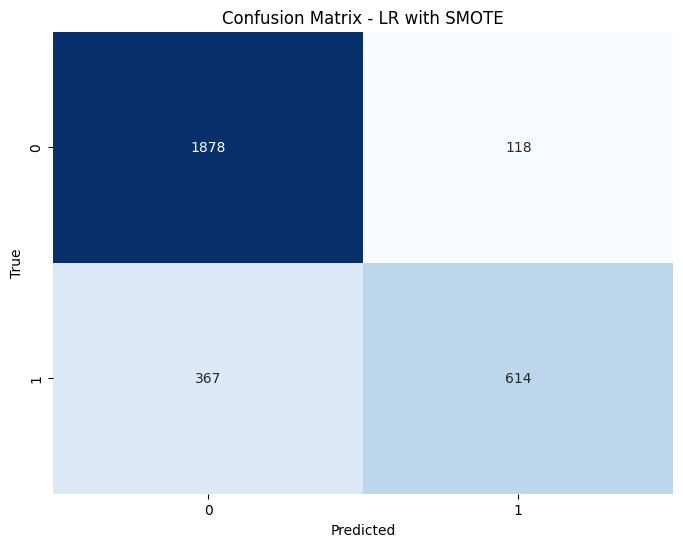

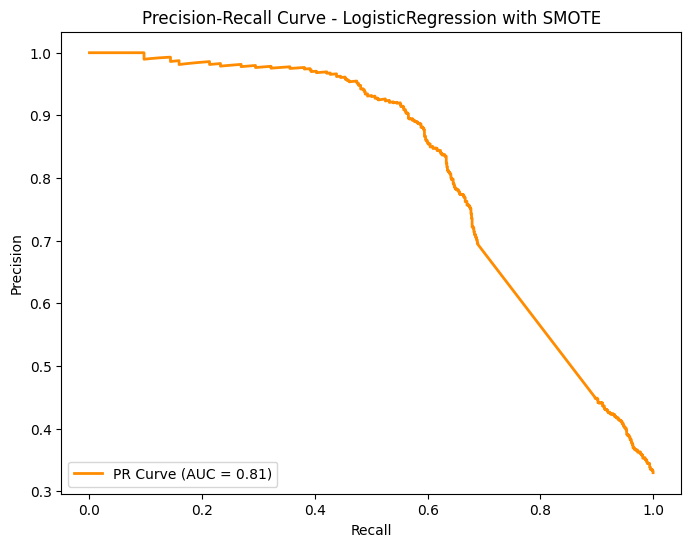

Precision-Recall Metrics:
AUC Score: 0.8114650433075435


In [45]:
X = df['tokenized_text'].values
y = df['is_hate_speech'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42)


# TfidfVectorizer
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    max_df=0.75,
    min_df=2
)


X_train_tfid = vectorizer.fit_transform(X_train)
X_test_tfid = vectorizer.transform(X_test)

# Feature selection with SelectKBest
k_best = SelectKBest((chi2), k=200)

X_train_tfid_selected = k_best.fit_transform(X_train_tfid, y_train)
X_test_tfid_selected = k_best.transform(X_test_tfid)


# SMOTE
smote = SMOTE(random_state=42)
X_res_smote, y_res_smote = smote.fit_resample(X_train_tfid_selected, y_train)
print('SMOTE Resampled dataset shape %s' % Counter(y_res_smote))

# LR with SMOTE
clf_smote = LogisticRegression(solver = 'liblinear', C =10, class_weight = 'balanced', max_iter = 500, penalty = 'l2')

clf_smote.fit(X_res_smote, y_res_smote)

y_pred_smote = clf_smote.predict(X_test_tfid_selected)

accuracy_smote = accuracy_score(y_test, y_pred_smote)
f1_scores_smote = f1_score(y_test, y_pred_smote, average='macro')
classification_rep_smote = classification_report(y_test, y_pred_smote)

print('SMOTE:')
print('Accuracy:', accuracy_smote)
print('F1-score_macro:', f1_scores_smote)
print('Classification Report:')
print(classification_rep_smote)

cm = confusion_matrix(y_test, y_pred_smote)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - LR with SMOTE')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, clf_smote.predict_proba(X_test_tfid_selected)[:, 1])

# Calculate area under the curve (AUC)
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='PR Curve (AUC = {:.2f})'.format(auc_score))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - LogisticRegression with SMOTE')
plt.legend(loc='lower left')
plt.show()

# Display precision-recall metrics
print("Precision-Recall Metrics:")
print("AUC Score:", auc_score)


# With metadata

In [31]:
df = pd.read_csv("df_preprocessed.csv", skipinitialspace= True)
df = df.drop(['Hash_words_ad','Hash_words_tweet','anonymized_description','tweet','Weighted_Engagement','clean_anonymized_description', 'clean_tweet', 'lemmatized_text', 'stemmed_text', 'pos_tags'], axis = 1 )
df.head()

,is_hate_speech,dataset,retweet_count,favorite_count,is_reply,is_quote,statuses_count,followers_count,friends_count,device,tweet_len,word_count,tokenized_text,swear_word_bin
0,1,0,0.0,6.0,1.0,0.0,554.0,748.0,753.0,5,120,20,"['denunce', 'beccando', 'Salvini', 'rischia', ...",0
1,0,0,154.0,448.0,0.0,0.0,35043.0,10838.0,4535.0,5,255,46,"['PRESCRIZIONE', 'tre', 'magi', 'trovato', 'la...",0
2,1,0,195.0,638.0,0.0,0.0,139750.0,7971.0,1866.0,5,255,40,"['m5s', 'votato', 'unionicivili', 'adducendo',...",1
3,0,0,112.0,377.0,0.0,0.0,3356.0,8493.0,5303.0,3,246,38,"['Lega', 'm5s', 'dando', 'bere', 'allopinione'...",0
4,0,0,45.0,143.0,0.0,0.0,11234.0,10815.0,1810.0,4,195,31,"['cambia', 'legge', 'Caro', 'decretoinsicurezz...",0


In [32]:
X_tweet = df['tokenized_text'].values
y = df['is_hate_speech'].values


In [33]:
#try Tfid vectorizer same approach 


TFvectorizer = TfidfVectorizer(
                              ngram_range=(1,2),
                               max_df=.75,
                               min_df = 2
                               )

X_tweet_tfid = TFvectorizer.fit_transform(X_tweet)


In [34]:
Cntvectorizer = CountVectorizer( # 
                                 ngram_range=(1,3),   # hyperparameter
                                 max_df=.75,
                                 min_df = 5)

X_tweet_cnt = Cntvectorizer.fit_transform(X_tweet)


In [35]:
df_meta = pd.read_csv("dataset_final.csv", skipinitialspace= True)
df_meta = df.drop(['is_hate_speech', 'tokenized_text', 'tweet_len'], axis = 1 )

In [36]:
df_meta = df_meta.values

In [37]:
# MERGE vectorized Tweet and metadata
# Keep SPARSE MATRIX

from scipy.sparse import hstack

merged_sparse_cnt = hstack([X_tweet_cnt, df_meta])


# Print the shape of the merged sparse matrix
print(merged_sparse_cnt.shape)

(9922, 5415)


In [38]:
# MERGE vectorized Tweet and metadata
# Keep SPARSE MATRIX

from scipy.sparse import hstack

merged_sparse_tfid = hstack([X_tweet_tfid, df_meta])


# Print the shape of the merged sparse matrix
print(merged_sparse_tfid.shape)

(9922, 18609)


In [39]:
#Split to train and test set for both vectorizers

X_train_meta_cnt, X_test_meta_cnt, y_train, y_test = train_test_split(merged_sparse_cnt, y, stratify = y, test_size=0.3, random_state=0)
X_train_meta_tfid, X_test_meta_tfid, y_train, y_test = train_test_split(merged_sparse_tfid, y, stratify = y, test_size=0.3, random_state=0)


In [40]:
print(X_train_meta_cnt.shape)
print(X_train_meta_tfid.shape)

(6945, 5415)
(6945, 18609)


In [41]:
clf = LogisticRegression()

clf.fit(X_train_meta_tfid, y_train)

y_pred = clf.predict(X_test_meta_tfid)


accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('F1-score_macro:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.6691299966409137
F1-score_macro: 0.403792911134728
Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      1996
           1       0.30      0.00      0.01       981

    accuracy                           0.67      2977
   macro avg       0.49      0.50      0.40      2977
weighted avg       0.55      0.67      0.54      2977



In [42]:
clf = LogisticRegression()

clf.fit(X_train_meta_cnt, y_train)

y_pred = clf.predict(X_test_meta_cnt)


accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('F1-score_macro:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.6691299966409137
F1-score_macro: 0.403792911134728
Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      1996
           1       0.30      0.00      0.01       981

    accuracy                           0.67      2977
   macro avg       0.49      0.50      0.40      2977
weighted avg       0.55      0.67      0.54      2977



In [43]:
# Feature selection with SelectKBest
k_best = SelectKBest(chi2, k=200)

X_train_selected = k_best.fit_transform(X_train_meta_tfid, y_train)
X_test_selected = k_best.transform(X_test_meta_tfid)


clf = LogisticRegression(solver = 'liblinear', C =10, class_weight = 'balanced', max_iter = 500, penalty = 'l2')

clf.fit(X_train_selected, y_train)

y_pred = clf.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred, digits=3)

print('Accuracy:', accuracy)
print('F1-score_macro:', f1_scores)
print('Classification Report:')
print(classification_rep)


Accuracy: 0.6241182398387639
F1-score_macro: 0.6092877553224916
Classification Report:
              precision    recall  f1-score   support

           0      0.781     0.611     0.685      1996
           1      0.451     0.651     0.533       981

    accuracy                          0.624      2977
   macro avg      0.616     0.631     0.609      2977
weighted avg      0.672     0.624     0.635      2977

